<a href="https://colab.research.google.com/github/ksachdeva/ml-in-hurry/blob/master/Machine_Learning_In_Hurry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>>>>> <img src="https://media.giphy.com/media/l41lUYsrdGwRowfss/giphy.gif" alt="" title="" />  

>>>>>> # Machine Learning In Hurry

# Python module imports

In [0]:
# Install all the dependencies

# Various imports
%matplotlib inline

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

from IPython.display import HTML

#Mathematics Review

##  Polynomials

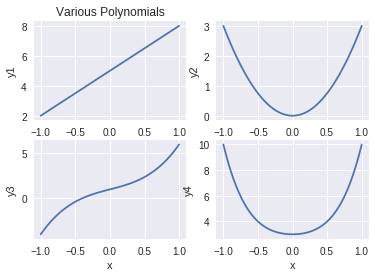

In [3]:
# get evenly spaced numbers over a specified interval.
x1 = np.linspace(-1, 1, 100)  

y1 = (3*x1 + 5)               # degree 1, binomial
y2 = (3*x1**2)                # degree 2, monomial
y3 = (3*x1**3 + 2*x1 + 1)     # degree 3, binomial
y4 = (4*x1**4 + 3*x1**2 + 3)  # degree 4, trinomial

# let's plot them
plt.subplot(2, 2, 1)
plt.plot(x1, y1)
plt.title('Various Polynomials')
plt.ylabel('y1')
plt.xlabel('x')

plt.subplot(2, 2, 2)
plt.plot(x1, y2)
plt.ylabel('y2')
plt.xlabel('x')

plt.subplot(2, 2, 3)
plt.plot(x1, y3)
plt.ylabel('y3')
plt.xlabel('x')

plt.subplot(2, 2, 4)
plt.plot(x1, y4)
plt.ylabel('y4')
plt.xlabel('x')

plt.show()

## Functions

### Math vs Programming 


> $y$ = $3x$ + 5


The above expression can also be written as 


> $f(x)$  = $3x$ + 5


If we were to use a programming language to implement above we would write it as :


```python
# a python function
def myFun(x):
  return 3*x + 5

y = myFun(45)

```

```javascript
// a javascript function
function myFun(x) {
  return 3*x + 5
}

var y = myFun(5)

```

Pretty similar however for the same function

* mathematician will say that  $y$ is  a **dependent** variable and $x$ is an **independent** variable.

* programmer will say that $x$ is an **input** (or **parameter** or **argument**) and $y$ is an **output** and the name of function is **myFun**.


Now let's consider this -


```python
# a python function
def myFun2(x):
  x2 = 3*x + 5
  x3 = makeHttpCall(x2)    # <-- introduces side effects
  return x3

y = myFun(45)

```

While above is still a function from a programming language point of view it is not a **pure** function. In other words it has **side effects**. 



### Types of functions

*Univariate function*  (=> 1 independent variable)

> $f(x)$ = $y = 3x + 5$

*Bivariate function* (=> 2 independent variables)

> $f(x,z)$ = $y = 3x + 7z + 3$ 

*Multivariate function*  (=> 2 or more independent variables)

> $f(x,z,a)$ = $y = 3x + 7z + 9a + 32$



### Difference between mathematical functions & programming language functions

> In $y = 3x + 7z + 5$,  

>> 3 is called a **coefficient** or **weight** of $x$

>> 7 is called a **coefficient** or **weight** of $z$

>> 5 is called **bias**

> Collectively 3, 7, and 5 are called **parameters**   <----- note this is different from programming languages where **inputs** of a function are also called **parameters**


### Now, let's try to write the equation in a general form


> $y$ = $w_1x + w_2z + b$ 

>> or better 

> $y$ = $w_1x_1 + w_2x_2 + b$ 

>> where


>$x_1$, $x_2$ are called **dependent variables** or **features**.

>> # ** YES ONE MORE NAME FOR THE SAME THING :( **

>> ![alt text](https://media.giphy.com/media/vh9isNb4S2Spa/giphy.gif)


### Composing functions in mathematics and functional programming

> Given two functions -

> $f(x) = 3x + 5$

> $g(x) = 7x^2 + 4$


> you can compose them as :  $y = f(g(x))$


**Note - Using above style of functional composition when doing regular programming will provide you enormous benefits over procedural and object oriented programming !!**


## Differential Calculus

Mathematics of computing the change in the **output** ($y$ or $f(x)$) for a very tiny change in the **input** (dependent variable(s))

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Tangent-calculus.svg/300px-Tangent-calculus.svg.png)


$f'(x)$ = $\frac{dy}{dx}$













In [4]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/WUvTyaaNkzM" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

#Fitting the curve

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7f/Curve_fitting.svg/300px-Curve_fitting.svg.png)

### Generate synthetic data that has some linear relationship

In [5]:
# let's generate some random points which based on a linear (polynomial of degree 1)
def generate_synthetic_data(num_samples):
  X = np.array(range(num_samples))
  random_noise = np.random.uniform(-10,90,size=num_samples)
  
  # this is our linear equation
  # coefficient or weight is 3.65
  # bias is random (but uniform)
  y = 3.65*X + random_noise     # <------- PAY ATTENTION TO THIS !!
  
  return X,y


# generate
X, y = generate_synthetic_data(30)

# let's have a look at the generated data
data = np.vstack([X, y]).T
df = pd.DataFrame(data, columns=['X', 'y'])
df.head(n=5)

,X,y
0,0.0,63.776689
1,1.0,41.739251
2,2.0,71.568466
3,3.0,4.400302
4,4.0,41.870770


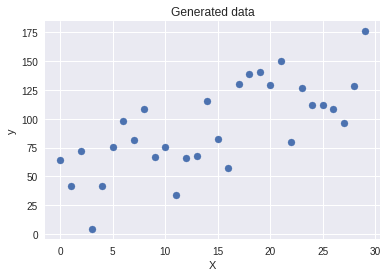

In [6]:
# visualize the generated data
plt.title("Generated data")
plt.scatter(x=df["X"], y=df["y"])
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### Which polynomial will describe our dataset the best ? 


>>  ![alt text](https://media.giphy.com/media/2wWBMyd02oMVJqTPZW/giphy.gif)





#### Guess the parameters !!  ..... SERIOUSLY 

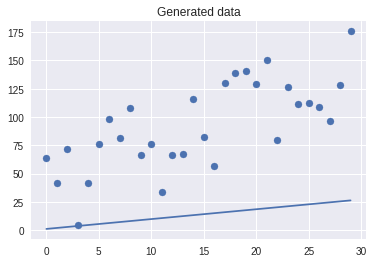

In [7]:
# Let's guess W1 and b and plot the resulting line

w1 = 0.87
b  = 0.98

y_pred = w1*X + b


plt.title("Generated data")
plt.scatter(x=df["X"], y=df["y"])
plt.plot(X, y_pred)

plt.show()


#### Find the residual or how far away the curve is from the actual points

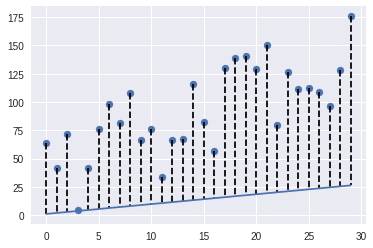

In [8]:
fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(X, y_pred)

# find the difference between
# predicted and actual value
dy = y_pred - y    # <---- residual (or loss !)

ax.vlines(X,y,y+dy, linestyles='dashed')

plt.show()

### Compute the cost of the prediction (or should I say @@ GUESS @@)

In [9]:
# See the loss per sample 
loss = (y - y_pred)
print(loss)

[ 62.79668932  39.88925148  68.84846568   0.81030193  37.41077038
  70.38210654  91.93175135  74.73148445 100.24527481  57.7955275
  66.13094655  23.43137932  54.9024548   55.19025272 102.41986364
  68.20293946  41.92541703 113.9135663  121.93823994 123.35701249
 110.45523798 130.94722511  59.37075243 105.65300069  89.91791968
  89.21183164  84.92293013  72.03301366 103.33264257 149.6292035 ]


#### Mean Squared Error

> $loss$ = $(y - y__pred)$

Above way of computing the loss does not take care of the negative and does not bring up to scale and hence 
we take the square of it to remove the **negativity**.

We also intend to take the average (mean) of the loss across all the samples and hence **Mean Squared Error** (or **MSE** for short !)



In [10]:
# Mean squared error
mse = (np.square(y - y_pred)).mean(axis=0)
print(f"Mean squared error for all samples {mse}")

Mean squared error for all samples 7351.478584141399


---

Let's write our loss i.e.

```python
mse = (np.square(y - y_pred)).mean(axis=0)
```

as a mathematical function

> $f(w_1, b)$ = $\frac{1}{N}\sum_{i=1}^{N} (y - (w_1x + b))^2$


Essentially, we now have a function (called loss function) that depends on ($w_1$ and $b$) and is of **quadratic in nature (i.e. is of degree 2)**


### Goal is to reduce/minimise the MSE !!

Since it is clear that the our loss function i.e. $f(w_1,b)$ depends on $w_1$ and $b$, so if we could adjust their values in such a way that value of $f(w_1,b)$ approaches **ZERO** !!

>> **BUT THIS BRINGS UP FOLLOWING QUESTIONS**


*Should we add to w1 and b ? or remove ? *

>> <img width=80 height=80 src="https://media.giphy.com/media/hTD23t0ABhv3SYCAGk/giphy.gif">

*And what should we add and/or remove to $w_1$ and $b$ ? *

>> <img width=80 height=80 src="https://media.giphy.com/media/4N1H43j8owKK24V2j6/giphy.gif">

### Gradient descent


![alt text](https://developers.google.com/machine-learning/crash-course/images/convex.svg)

![alt text](https://i.ytimg.com/vi/b4Vyma9wPHo/maxresdefault.jpg)

In [0]:
class GradientDescentExample(object):
  def __init__(self):
    
    # create a range of weights
    w_min = -30
    w_max = 30
   
    self.w = np.linspace(w_min, w_max, 200)
    
    self.y = GradientDescentExample.f(self.w)
    
    self.learning_rate = .05  # Learning rate
    
    
    self.w_est = -25   # Starting point (the GUESS !!)
    self.y_est = GradientDescentExample.f(self.w_est)  
    
    
    # code to setup our graph etc
    self.fig, ax = plt.subplots()    
    ax.set_xlim([w_min, w_max])
    ax.set_ylim([-5, 1500])    
    ax.set_xlabel("w")
    ax.set_ylabel("f(w)")
    
    plt.title("Gradient Descent")
    self.line, = ax.plot([], [])
    self.scat = ax.scatter([], [], c="red")
    self.text = ax.text(-25,1300,"")
  
  @staticmethod
  def f(w):
    # loss function to minize
    # This loss function depends on quadratic w
    return w**2 + 5 * w + 24
  
  @staticmethod
  def fd(w):
    # Derivative of the function
    return 2*w + 5  
  
  # @staticmethod
  def animate_fn(self, i):    

    # Gradient descent
    self.w_est = self.w_est - GradientDescentExample.fd(self.w_est) * self.learning_rate
    self.y_est = GradientDescentExample.f(self.w_est)

    # Update the plot
    self.scat.set_offsets([[self.w_est,self.y_est]])
    self.text.set_text("Value : %.2f" % self.y_est)
    self.line.set_data(self.w, self.y)
    return self.line, self.scat, self.text
  
  def run(self):
    anim = animation.FuncAnimation(self.fig, self.animate_fn, 50, interval=1000, blit=True)
    return HTML(anim.to_html5_video())   
    


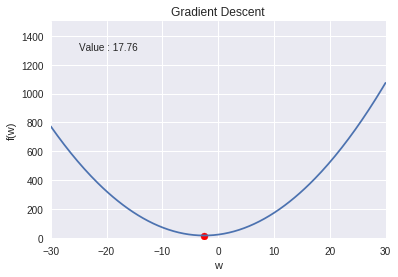

In [12]:
gd_example = GradientDescentExample()
gd_example.run()

In [0]:
# let's first define out cost function 
# so that we can invoke with updated values of w & b

def cost_fn(x, y_actual, w, b):
  y_new_pred = w*x + b
  mse = (np.square(y_actual - y_new_pred)).mean(axis=0)
  return mse
  

In [0]:
def update_parameters(x, y_actual, w, b, learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    num_of_samples = len(x)

    # we go over all the samples
    for i in range(num_of_samples):
        # Calculate partial derivatives
        # -2x(y - (wx + b))
        weight_deriv += -2*x[i] * (y[i] - (w*x[i] + b))

        # -2(y - (wx + b))
        bias_deriv += -2*(y[i] - (w*x[i] + b))

    # We subtract because the derivatives point in direction of steepest ascent
    w -= (weight_deriv / num_of_samples) * learning_rate
    b -= (bias_deriv / num_of_samples) * learning_rate

    return w, b

In [0]:
def train(x, y_actual, w, b, learning_rate, iters):
    cost_history = []
    w_history = []
    b_history = []
    

    for i in range(iters):
        w, b = update_parameters(x, y, w, b, learning_rate)
        w_history.append(w)
        b_history.append(b)

        cost = cost_fn(x, y, w, b)
        cost_history.append(cost)

        # Log Progress
        if i % 10 == 0:
            print("iter: "+str(i) + " cost: "+str(cost))

    return w, b, cost_history, w_history, b_history

In [16]:
w, b, cost_history, w_history, b_history = train(X, y, w1, b, 0.0001, 190)

iter: 0 cost: 6677.282647235398
iter: 10 cost: 2944.0199813848853
iter: 20 cost: 1793.7254843239277
iter: 30 cost: 1439.015796987448
iter: 40 cost: 1329.3559542920395
iter: 50 cost: 1295.1747521686675
iter: 60 cost: 1284.2422774557465
iter: 70 cost: 1280.4711060181721
iter: 80 cost: 1278.906122756859
iter: 90 cost: 1278.0210938651594
iter: 100 cost: 1277.3459210500178
iter: 110 cost: 1276.7358081006123
iter: 120 cost: 1276.1461556498818
iter: 130 cost: 1275.563226130158
iter: 140 cost: 1274.9827877691437
iter: 150 cost: 1274.4035366910769
iter: 160 cost: 1273.8250708470125
iter: 170 cost: 1273.2472659616624
iter: 180 cost: 1272.670083317733


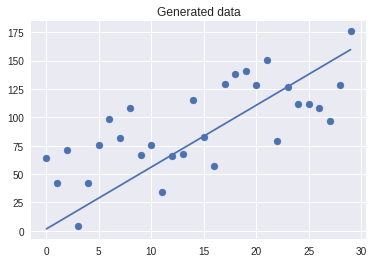

In [17]:
y_pred_2 = w*X + b


plt.title("Generated data")
plt.scatter(x=df["X"], y=df["y"])
plt.plot(X, y_pred_2)
plt.show()

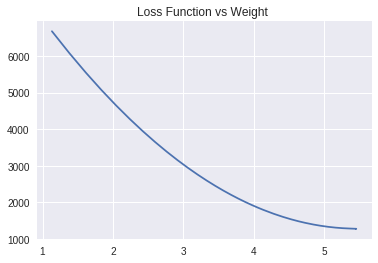

In [18]:
plt.title("Loss Function vs Weight ")
plt.plot(w_history, cost_history)
plt.show()

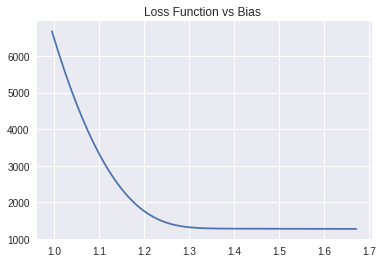

In [19]:
plt.title("Loss Function vs Bias ")
plt.plot(b_history, cost_history)
plt.show()

# Artificial Neural Networks  --> **THE FUNCTION APPROXIMATORS**







## The artifical neuron

![alt text](https://i.stack.imgur.com/xhGPV.png)



![alt text](https://images.xenonstack.com/blog/Working-Of-Artificial-Neuron.jpg)

## Neural network

![alt text](https://cdn-images-1.medium.com/max/1200/0*tUvxnJOc9dxEziaZ.jpg)

## The training algorithm

> ![alt text](https://www.researchgate.net/profile/Alireza_Amini6/publication/283397139/figure/fig2/AS:323456970313729@1454129559742/A-three-layered-feed-forward-neural-network-with-BP-training-algorithm.png)

### Psuedo algorithm for training for software engineers

1. Randomly (i.e. guess) set the initial value of $b$ & $w_1$ in $y = b + w_1x$

2. For every sample provided as part of training data compute the predicted value ($y_pred$)

3. Compare it with the observed value (i.e. the label) and apply the loss function i.e. if you are applying MSE, compute the SSE and take its mean

4. Based on the MSE, adjust  $w$ & $b$ 

5. Go back to step 2

6. Steps 2 to 5 are repeated until MSE is low enough to your satisfaction or defined number of iterations (called **epochs**) have been done


# Data is KING  !!!

![alt text](https://cdn-images-1.medium.com/max/1600/1*8fphzGUa4BdpoXaNGttziw.png)


**NOTE** -

$y$ = $f(x_1, x_2, x_3)$ is called **label** or **ground truth** or **observed value**


One of the biggest challenge is to have **data** that is **labelled** or in other words for given input **features** what is the **ground truth** !!




# Machine learning branches

![alt text](https://raw.githubusercontent.com/trekhleb/homemade-machine-learning/master/images/machine-learning-map.png)

# What is the relation with Artificial Intelligence ?

![alt text](https://i.pinimg.com/originals/08/fa/69/08fa6996cac1b67224cc97e502c799dd.jpg)

# Computer Vision


![alt text](http://www.themtank.org/images/c-image12.jpg)

# Image pre-processing

## What is an image ?








In [27]:
# download the test image
!wget https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png

--2019-01-09 18:17:19--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna_(test_image).png.1’

Lenna_(test_image). 100%[===================>] 462.73K  --.-KB/s    in 0.06s   

2019-01-09 18:17:19 (7.16 MB/s) - ‘Lenna_(test_image).png.1’ saved [473831/473831]



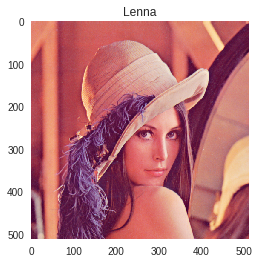

In [28]:
def display_lenna():
  img = cv2.imread("/content/Lenna_(test_image).png")
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.grid(False)
  plt.title('Lenna')
  plt.show()
  
display_lenna()

### Mathematician 

To a mathematician it a function of two independent variables ---> $f(x, y)$

Where x & y are the spatial co-ordinates &

Amplitude (a) of the function is the intensity of the image at a given point (x1, y1)

For “digital” image – $x$, $y$ & $a$ are discrete and finite


### To a programmer (computer)

It is a 2D array

* An array is a sequence of numbers

* The memory for computer is linear but programming languages provide a way to represent 2D data as 2D arrays and traverse through the linear data as if it is 2D

![alt text](https://www.codingeek.com/wp-content/uploads/2017/01/2D-arrays.png)




---

The value of $f(x,y)$ is in the range (0, 255) 

** Then how do we represent a color image ?**

![alt text](https://www.researchgate.net/profile/Jane_Courtney2/publication/267210444/figure/fig6/AS:295732335661069@1447519491773/A-three-dimensional-RGB-matrix-Each-layer-of-the-matrix-is-a-two-dimensional-matrix.png)

For a programmer -> it is an array of three 2D arrays

For a mathematician -> it is a vector of three functions of form [$f(x,y)$,$f(x,y)$,$f(x,y)$]


## Finding a pattern in the image

### Filters

A filter is a **template** that is applied on the target image to find pattern and generate a filtered image !

![alt text](https://cdn-images-1.medium.com/max/1200/1*1okwhewf5KCtIPaFib4XaA.gif)


The filters are generally of **odd** sizes e.g. 3x3, 5x5 and 7x7






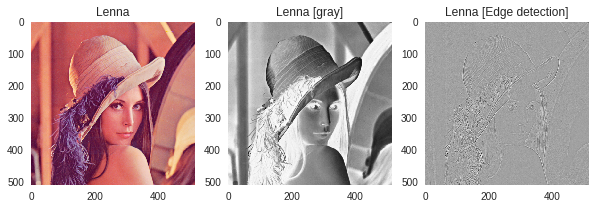

In [49]:
def apply_edge_filter_to_lenna():
  
  plt.figure(figsize=(10,3))
  
  # display colored lenna  
  img = cv2.imread("/content/Lenna_(test_image).png")
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.subplot(1, 3, 1)
  plt.imshow(img)
  plt.grid(False)
  plt.title('Lenna')
    
  
  image = cv2.imread('/content/Lenna_(test_image).png', cv2.IMREAD_GRAYSCALE).astype(float) / 255.0
  
  # display gray lenna
  plt.subplot(1, 3, 2)
  plt.imshow(image)
  plt.grid(False)
  plt.title('Lenna [gray]')
  
  kernel = np.array([[-1, -1, -1],
                     [-1, 8, -1],
                     [-1, -1, -1]])


  filtered = cv2.filter2D(src=image, kernel=kernel, ddepth=-1)

  plt.subplot(1, 3, 3)
  plt.imshow(filtered)
  plt.grid(False)
  plt.title('Lenna [Edge detection]')
  plt.show()
  
apply_edge_filter_to_lenna()

### Convolution (actually Cross Correlation operation)


![alt text](https://cdn-images-1.medium.com/max/1600/1*_34EtrgYk6cQxlJ2br51HQ.gif)


>> ![alt text](https://graphics.stanford.edu/courses/cs178/applets/convolution-equation1-2c.jpg)




---


## The rock stars here are ---------->  "FILTERS" !

When doing traditional image processing, these filters are manually created/discovered/learned and unfortunately the domain of object detection is so big that crafting them manually does not work !!

We transform our problem from crafting these filters to discover (learn) these filters with the help of neural networks.

This is where image processing meets machine learning and we go into computer vision !!


> ![alt text](https://media.giphy.com/media/l3dj09hpsfuYkijDi/giphy.gif)

# Convolutional Neural Network

![alt text](https://cdn-images-1.medium.com/max/1600/1*NQQiyYqJJj4PSYAeWvxutg.png)


** Could we not use Artifical Neural Networks ?**

The answer is we can but since every pixel in an image is considered an input **feature** there are just too many features which implies too many **parameters** to learn.

Also, unlike regression style (numerical) problems our target is learn the **parameters** (filters) in a **scale** and **location** agnostic (variance) manner. 


A CNN follows the similar priniciples of ANN i.e. notion of layers, neurons, loss function, back propagation but the initial layers in it perform **cross correlation** operation to reduce the size of features and learn the 2D filters.




